# **Analisis Prediksi Kualitas Udara dan Evaluasi Polusi Lingkungan Menggunakan Metode Random Forest dan SVM**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Kuliah/DataMining/updated_pollution_dataset.csv")

df.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


Pre-proceessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
len(df)

5000

In [6]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [7]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                               Total  Percent
Temperature                        0      0.0
Humidity                           0      0.0
PM2.5                              0      0.0
PM10                               0      0.0
NO2                                0      0.0
SO2                                0      0.0
CO                                 0      0.0
Proximity_to_Industrial_Areas      0      0.0
Population_Density                 0      0.0
Air Quality                        0      0.0


In [8]:
# Mengubah nama kolom
df = df.rename(columns={'Air Quality': 'air_quality'})

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalisasi Data
scaler = MinMaxScaler()
columns_to_normalize = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Deteksi dan Penanganan Outlier dengan IQR
Q1 = df[columns_to_normalize].quantile(0.25)
Q3 = df[columns_to_normalize].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menangani outlier dengan mengganti nilai yang terdeteksi sebagai outlier dengan nilai batas
df[columns_to_normalize] = np.where(df[columns_to_normalize] < lower_bound, lower_bound, df[columns_to_normalize])
df[columns_to_normalize] = np.where(df[columns_to_normalize] > upper_bound, upper_bound, df[columns_to_normalize])

# Menampilkan data setelah normalisasi dan penanganan outlier
print("Data setelah Normalisasi dan Penanganan Outlier:")
print(df)

Data setelah Normalisasi dan Penanganan Outlier:
      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0        0.362832  0.250814  0.017627  0.057278  0.200000  0.301370  0.348534   
1        0.329646  0.429967  0.007797  0.039241  0.406957  0.311155  0.322476   
2        0.214602  0.420195  0.090508  0.107595  0.295652  0.367906  0.319218   
3        0.303097  0.033659  0.020678  0.020570  0.106087  0.225049  0.162866   
4        0.289823  0.376764  0.023390  0.051266  0.252174  0.230920  0.117264   
...           ...       ...       ...       ...       ...       ...       ...   
4995     0.601770  0.413681  0.197797  0.243671  0.662609  0.624266  0.475570   
4996     0.325221  0.661238  0.023390  0.079747  0.311304  0.332681  0.289902   
4997     0.276549  0.458198  0.048136  0.070570  0.476522  0.273973  0.319218   
4998     0.263274  0.091205  0.072542  0.092405  0.283478  0.232877  0.078176   
4999     0.236726  0.454940  0.197797  0.243671  0.274783  0

Encoding

In [10]:
age_mapping = {'Good' :0,
               'Moderate' :1,
               'Poor' :2,
               'Hazardous' :3
               }

# Daripada memetakan secara langsung dan berpotensi memperkenalkan NaN,
# isi NaN dengan placeholder, misalnya, 0, jika ada setelah pemetaan
df['air_quality'] = df['air_quality'].map(age_mapping).fillna(0)

# Pastikan X tidak mengandung nilai NaN apa pun sebelum menerapkan SMOTE
X = df.drop(columns=['air_quality']).fillna(0).values  # Replace NaNs with 0

In [11]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,air_quality
0,0.362832,0.250814,0.017627,0.057278,0.200000,0.301370,0.348534,0.163090,0.170351,1
1,0.329646,0.429967,0.007797,0.039241,0.406957,0.311155,0.322476,0.150215,0.550065,1
2,0.214602,0.420195,0.090508,0.107595,0.295652,0.367906,0.319218,0.115880,0.560468,1
3,0.303097,0.033659,0.020678,0.020570,0.106087,0.225049,0.162866,0.369099,0.472042,0
4,0.289823,0.376764,0.023390,0.051266,0.252174,0.230920,0.117264,0.437768,0.149545,0


EDA

In [12]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,air_quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,0.366754,0.369557,0.060995,0.089924,0.329814,0.315296,0.276334,0.254041,0.402349,1.0000
std,0.145194,0.171598,0.058299,0.065197,0.152230,0.125835,0.175769,0.153989,0.198576,1.0001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,0.258850,0.242128,0.015593,0.039557,0.220870,0.221135,0.123779,0.124464,0.250975,0.0000
50%,0.345133,0.366992,0.040678,0.069304,0.311304,0.277886,0.247557,0.231760,0.397919,1.0000
75%,0.455752,0.480999,0.088475,0.121203,0.426087,0.389922,0.387622,0.369099,0.535761,2.0000
max,0.751106,0.839305,0.197797,0.243671,0.733913,0.643102,0.783388,0.736052,0.962939,3.0000


<Figure size 1200x800 with 0 Axes>

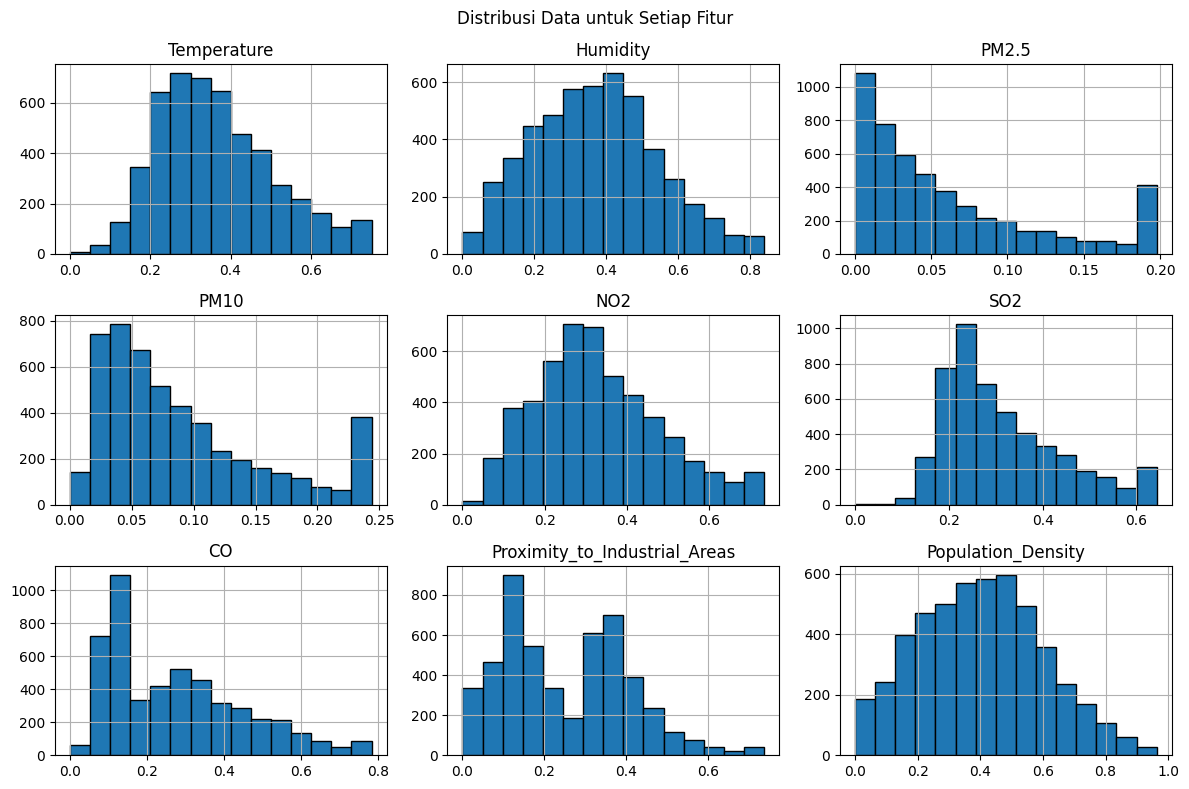

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi korelasi antar fitur
# 1. Visualisasi Histogram untuk melihat distribusi data
plt.figure(figsize=(12, 8))
df[columns_to_normalize].hist(bins=15, edgecolor='black', figsize=(12, 8))
plt.suptitle('Distribusi Data untuk Setiap Fitur')
plt.tight_layout()
plt.show()

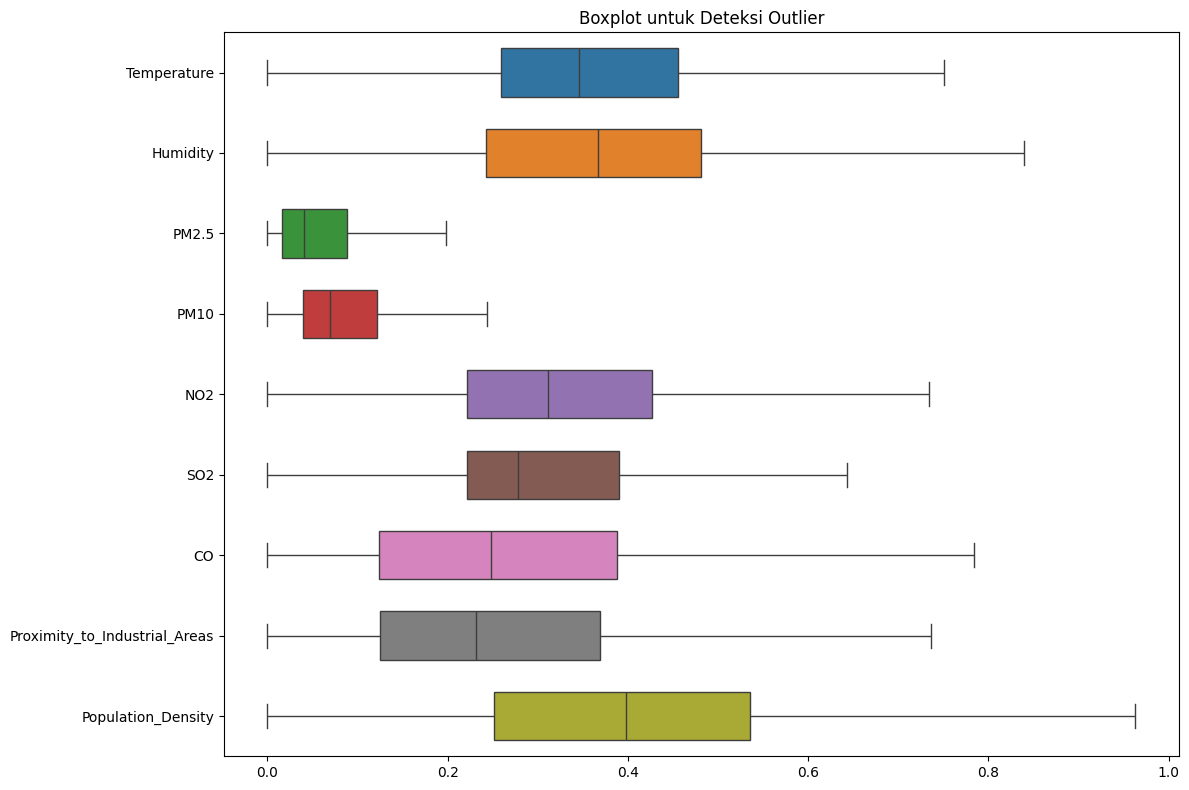

In [14]:
# 2. Boxplot untuk deteksi outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_normalize], orient="h", width=0.6)
plt.title('Boxplot untuk Deteksi Outlier')
plt.tight_layout()
plt.show()

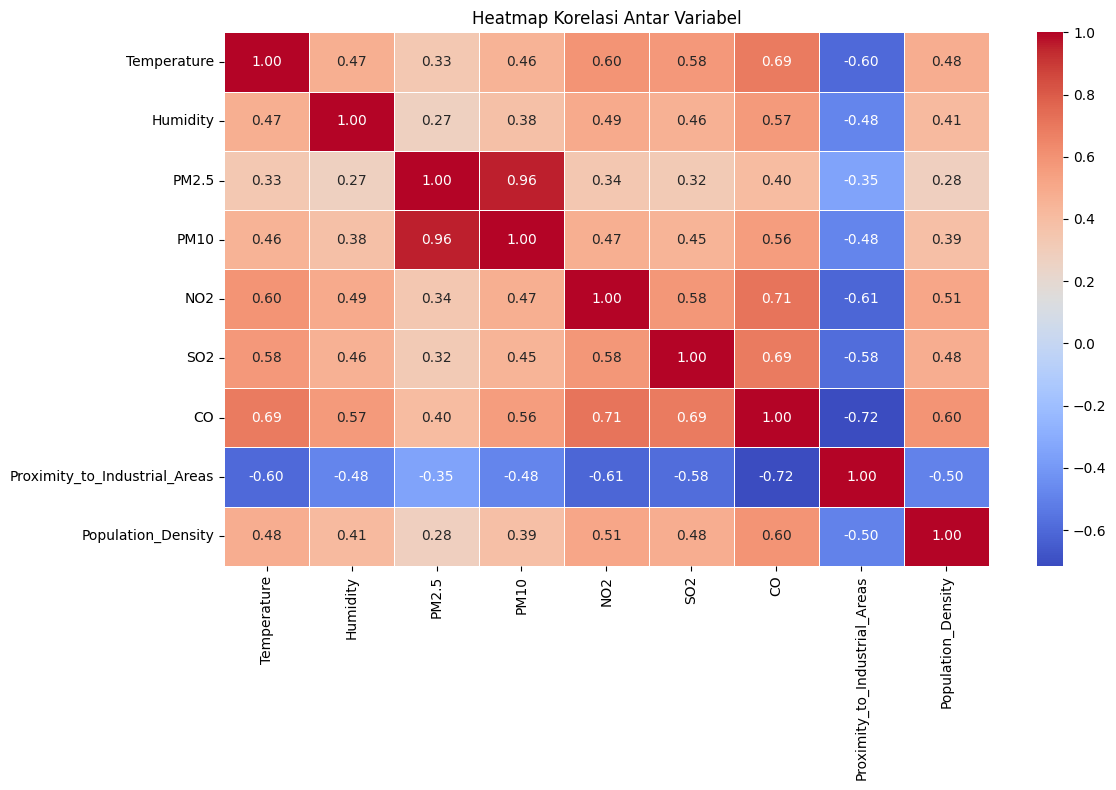

In [15]:
# 3. Heatmap Korelasi untuk melihat hubungan antar variabel
plt.figure(figsize=(12, 8))
correlation_matrix = df[columns_to_normalize].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Tentukan jumlah fitur terbaik yang ingin dipilih
k = 5  # Misalnya, pilih 5 fitur terbaik

# Inisialisasi objek SelectKBest dengan uji ANOVA (f_classif)
selector = SelectKBest(score_func=f_classif, k=k)

# Lakukan seleksi fitur
X_new = selector.fit_transform(X, df['air_quality'])

# Dapatkan indeks fitur yang dipilih
selected_features_indices = selector.get_support(indices=True)

# Dapatkan nama fitur yang dipilih
selected_features = df.drop(columns=['air_quality']).columns[selected_features_indices]

# Cetak nama fitur yang dipilih
print("Fitur yang dipilih:", selected_features)

# Buat DataFrame baru dengan fitur yang dipilih
X_selected = pd.DataFrame(X_new, columns=selected_features)

# Gabungkan fitur yang dipilih dengan kolom target
df_selected = pd.concat([X_selected, df['air_quality']], axis=1)

# Sekarang df_selected berisi dataset dengan fitur-fitur yang telah dipilih
print("\nDataset dengan fitur terpilih:")
print(df_selected.head())

Fitur yang dipilih: Index(['Temperature', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas'], dtype='object')

Dataset dengan fitur terpilih:
   Temperature       NO2       SO2        CO  Proximity_to_Industrial_Areas  \
0     0.362832  0.200000  0.301370  0.348534                       0.163090   
1     0.329646  0.406957  0.311155  0.322476                       0.150215   
2     0.214602  0.295652  0.367906  0.319218                       0.115880   
3     0.303097  0.106087  0.225049  0.162866                       0.369099   
4     0.289823  0.252174  0.230920  0.117264                       0.437768   

   air_quality  
0            1  
1            1  
2            1  
3            0  
4            0  


In [17]:
from sklearn.model_selection import train_test_split

# Menentukan variabel X (fitur) dan y (label)
X = df.drop('air_quality', axis=1)
y = df['air_quality']

# Membagi data menjadi data latih (train) dan data uji (test) dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran data latih (X_train, y_train):", len(X_train), len(y_train))
print("Ukuran data uji (X_test, y_test):", len(X_test), len(y_test))


Ukuran data latih (X_train, y_train): 4000 4000
Ukuran data uji (X_test, y_test): 1000 1000


In [18]:
# Memeriksa distribusi kelas dalam data latih dan data uji
print("Distribusi kelas pada y_train:")
print(y_train.value_counts())

print("\nDistribusi kelas pada y_test:")
print(y_test.value_counts())


Distribusi kelas pada y_train:
air_quality
0    1591
1    1206
2     814
3     389
Name: count, dtype: int64

Distribusi kelas pada y_test:
air_quality
0    409
1    294
2    186
3    111
Name: count, dtype: int64


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Membagi data dengan stratifikasi agar distribusi kelas di X_train dan X_test lebih seimbang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi hasil dengan Random Forest
rf_pred = rf_model.predict(X_test)

# 2. Support Vector Machine Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Memprediksi hasil dengan SVM
svm_pred = svm_model.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# 3. Evaluasi Performansi untuk Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')  # Menggunakan 'weighted' untuk multiclass
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

# 4. Evaluasi Performansi untuk SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

# Menampilkan hasil evaluasi untuk kedua model
print("Evaluasi untuk Random Forest:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}\n")

print("Evaluasi untuk Support Vector Machine:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}\n")

# Memilih model terbaik berdasarkan F1-Score (atau metrik lainnya)
if rf_f1 > svm_f1:
    print("Model terbaik adalah Random Forest dengan F1-Score:", rf_f1)
else:
    print("Model terbaik adalah Support Vector Machine dengan F1-Score:", svm_f1)


Evaluasi untuk Random Forest:
Accuracy: 0.9640
Precision: 0.9647
Recall: 0.9640
F1 Score: 0.9641

Evaluasi untuk Support Vector Machine:
Accuracy: 0.9530
Precision: 0.9529
Recall: 0.9530
F1 Score: 0.9528

Model terbaik adalah Random Forest dengan F1-Score: 0.9641250670376911


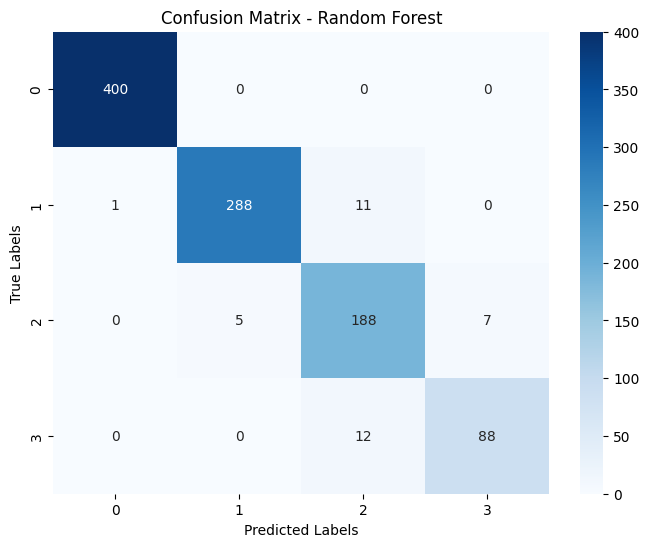

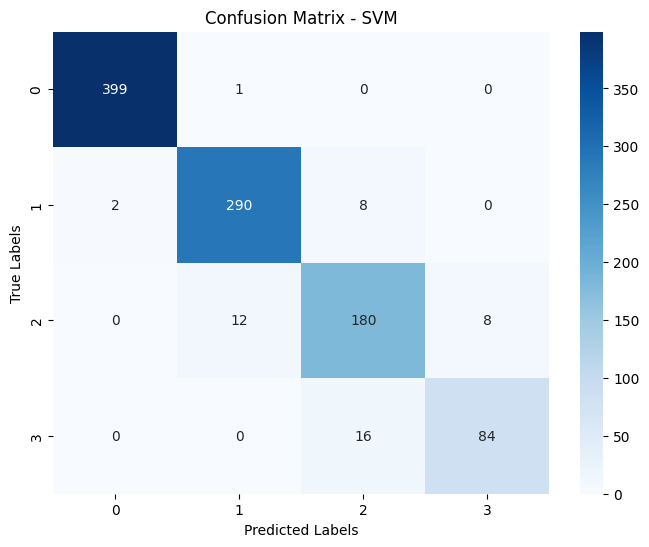

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [22]:
import joblib

# Simpan model RandomForest
joblib.dump(rf_model, '/content/drive/MyDrive/Kuliah/DataMining/rf_model.pkl')

# Simpan model SVM
joblib.dump(svm_model, '/content/drive/MyDrive/Kuliah/DataMining/svm_model.pkl')

print("Model berhasil disimpan di Google Drive")

Model berhasil disimpan di Google Drive
